In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
!pip install tensorflow-gpu

In [ ]:
!nvidia-smi

Mon May 31 13:18:52 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    27W /  70W |    102MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [ ]:
data_dir="/content/drive/MyDrive/data"
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3000 files belonging to 3 classes.
Using 2400 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3000 files belonging to 3 classes.
Using 600 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['A', 'B', 'C']


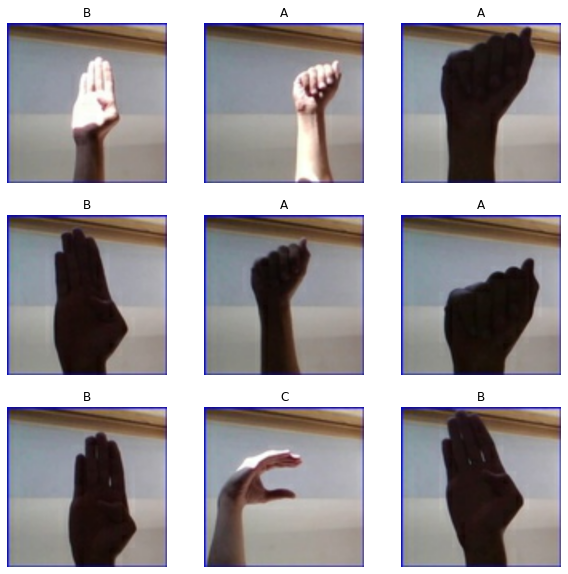

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
cnn_fit = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


75/75 [==============================] - 425s 6s/step - loss: 0.4446 - accuracy: 0.8121 - val_loss: 0.0783 - val_accuracy: 0.9833
Epoch 2/5
75/75 [==============================] - 65s 866ms/step - loss: 0.0106 - accuracy: 0.9979 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 3/5
75/75 [==============================] - 65s 861ms/step - loss: 6.7484e-04 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 4/5
75/75 [==============================] - 66s 871ms/step - loss: 2.9406e-04 - accuracy: 1.0000 - val_loss: 7.0935e-04 - val_accuracy: 1.0000
Epoch 5/5
75/75 [==============================] - 66s 873ms/step - loss: 1.7420e-04 - accuracy: 1.0000 - val_loss: 6.3418e-04 - val_accuracy: 1.0000


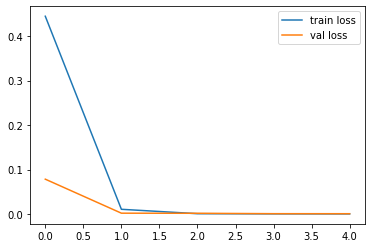

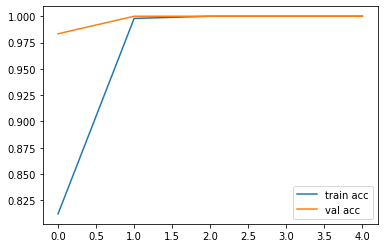

In [ ]:
# plot the loss
plt.plot(cnn_fit.history['loss'], label='train loss')
plt.plot(cnn_fit.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(cnn_fit.history['accuracy'], label='train acc')
plt.plot(cnn_fit.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
tf.keras.models.save_model(model,'cnn_sign1.hdf5')

In [ ]:
!pip install streamlit

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st



@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/cnn_sign1.hdf5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # American Sign Language Classification(Deep Learning)
         """
         )

file = st.file_uploader("Please upload an brain scan file", type=["jpg", "png"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):
    
        size = (180,180)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        img_reshape = img[np.newaxis,...]
        prediction = model.predict(img_reshape)
        
        return prediction
if file is None:
    st.text("Please upload an image file")

else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    class_names=["A","B","C"]
    #score = tf.nn.softmax(predictions[0])
    #st.write(predictions)
    #st.write(score)
    print_str="Above sign is classified as "+class_names[np.argmax(predictions)]
    st.success(print_str)

Overwriting app.py


In [ ]:
!pip install pyngrok

In [ ]:
!ngrok authtoken 1tGLNJBXJUIiNTxRXTdk8caeKnO_84WvrTCP9VFErxDYX9k9i

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port=8501)
url

<NgrokTunnel: "http://fe6322ac3042.ngrok.io" -> "http://localhost:80">

In [ ]:
!streamlit run --server.port 80 app.py

2021-05-31 15:15:40.730 An update to the [server] config option section was detected. To have these changes be reflected, please restart streamlit.
2021-05-31 15:15:41.073775: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://34.86.214.182:80

2021-05-31 15:15:42.435514: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-05-31 15:15:42.441649: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-31 15:15:42.442274: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40